
# <center>CREMA-D: Crowd-sourced Emotional Multimodal Actors Dataset</center>
<center> <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4313618/"> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4313618/ </a></center>
<br>
   
CREMA-D is a labeled data set for the study of multimodal expression and perception of basic acted emotions. The dataset includes __7,442 clips from 91 actors and actresses__, with diverse age and ethnicity, expressing six of the seven "universal emotions": happy, sad, anger, fear, disgust, and neutral (surprise was not considered by the acting directors to be sufficiently specific, as it could relate to any of the other emotions with rapid onset).<br>
There are 91 actors, 48 male and 43 female (51 actors worked with one director, 40 with the another). The actors were between the ages of 20 and 74 with a mean age of 36.
The target emotions were happy, sad, anger, fear, disgust, as well as neutral. There are 12 sentences, each rendered in all of the emotional states. The actors were directed to express the first sentence in three levels of intensity: low, medium, and high. For the remaining 11 sentences the intensity level was unspecified. 

The 12 sentences were:
   - It's eleven o'clock. 
   - That is exactly what happened. 
   - I'm on my way to the meeting.
   - I wonder what this is about.
   - The airplane is almost full.
   - Maybe tomorrow it will be cold.
   - I would like a new alarm clock.
   - I think I have a doctor's appointment.
   - Don't forget a jacket.
   - I think I've seen this before.
   - The surface is slick.
   - We'll stop in a couple of minutes.

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:
> __'ANG'__ = 'anger', 
__'DIS'__ = 'disgust', 
__'FEA'__ = 'fear', 
__'HAP'__ = 'happiness', 
__'SAD'__ = 'sadness', 
__'NEU'__ = 'neutral'

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import os

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

In [2]:
# make a list of all the wav files
files = glob('archive/*/*.wav')

In [4]:
crema = "archive/AudioWAV/"

crema_dir_list = os.listdir(crema)

file_emotion = []
file_path = []

for file in crema_dir_list:
    # storing file paths
    file_path.append(crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)
crema_df.head()

,Emotions,Path
0,angry,archive/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,archive/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,archive/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,archive/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,archive/AudioWAV/1001_DFA_NEU_XX.wav


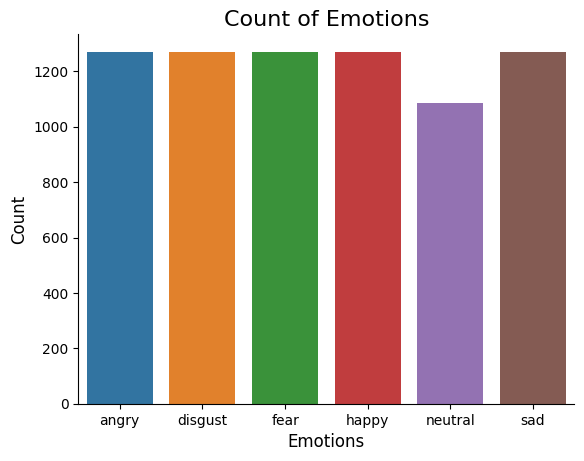

In [5]:
plt.title('Count of Emotions', size=16)
sns.countplot(x=crema_df['Emotions'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

__Observation:__ The emotions in the dataset seem to be evenly distributed. The neutral emotion has a bit less files, but I would say it is not that important. 

In [6]:
# show the average, max and min duration of the voice files
durations = [ librosa.get_duration(filename=p) for p in files ]

stats = {
    'mean': np.mean(durations),
    'max': np.max(durations),
    'min': np.min(durations),
}

print(stats)

{'mean': 2.5428836670249932, 'max': 5.005, 'min': 1.2679375}


The average length of a voice file is not that long, which could affect for the later stage of training the model.

## Visualizing with waveplots and spectograms

In [7]:
# function to show a waveplot of the audio
# where sr => sampling rate and em => emotion

def create_waveplot(data, sr, em):
    plt.figure(figsize=(8, 2))
    plt.title('Waveplot for audio with {} emotion'.format(em), size=10)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# function to create a spectogram
def create_spectrogram(data, sr, em):
    # stft function converts the data into short term fourier transform
    # STFT has smaller time frames, consequently, the frequency spectrum moves smoother over time
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(7, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(em), size=10)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

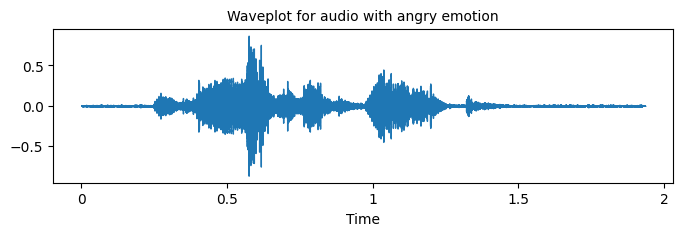

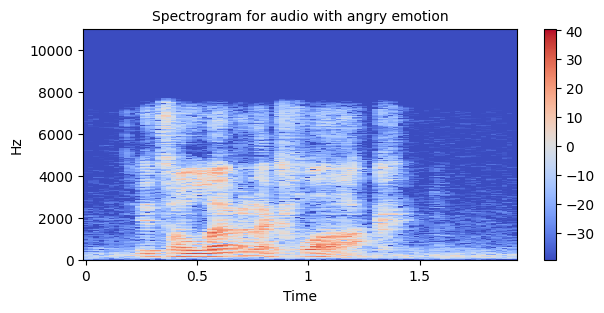

In [8]:
from IPython.display import Audio

emotion = 'angry'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

# print the average length of the audio
# duration = librosa.get_duration(y=data, sr=sampling_rate)
# print(duration)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

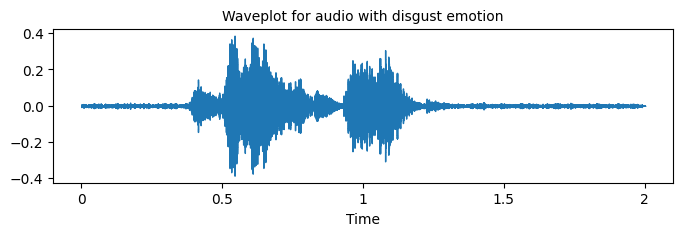

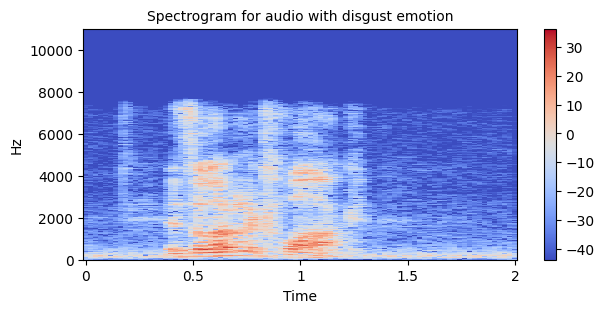

In [9]:
emotion = 'disgust'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

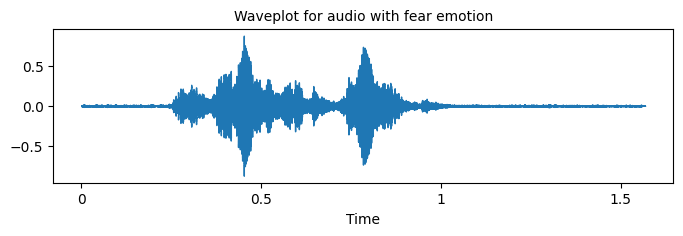

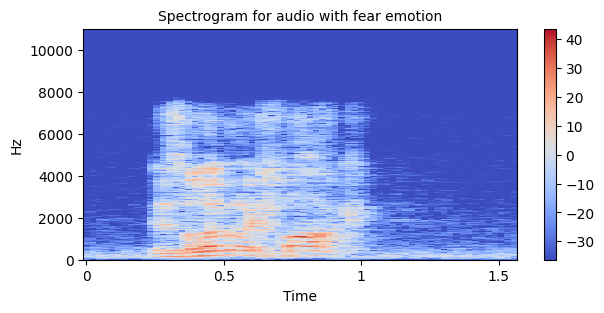

In [10]:
emotion = 'fear'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

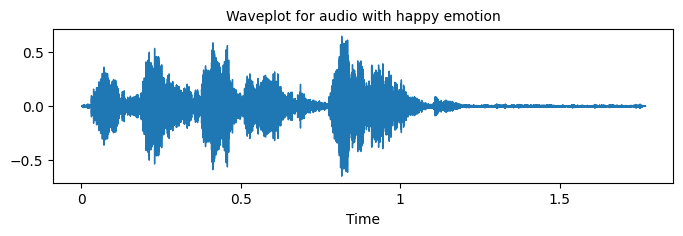

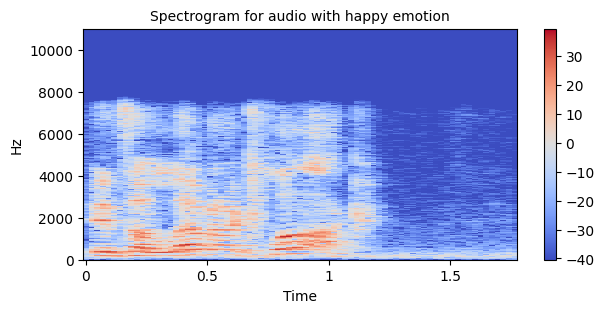

In [11]:
emotion = 'happy'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

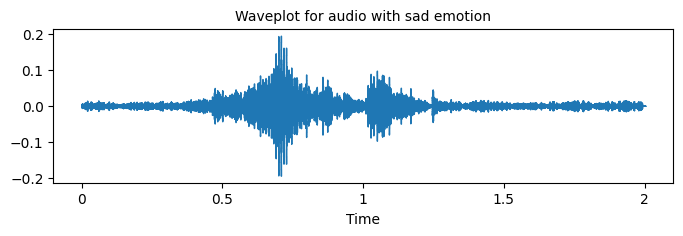

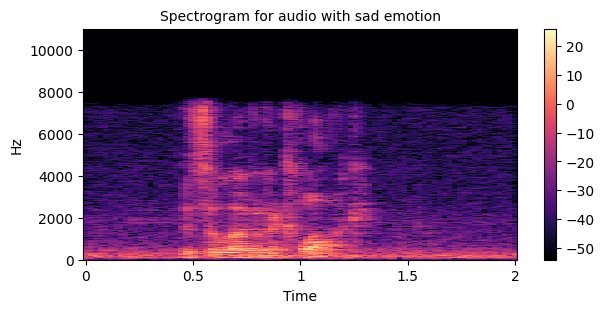

In [12]:
emotion = 'sad'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

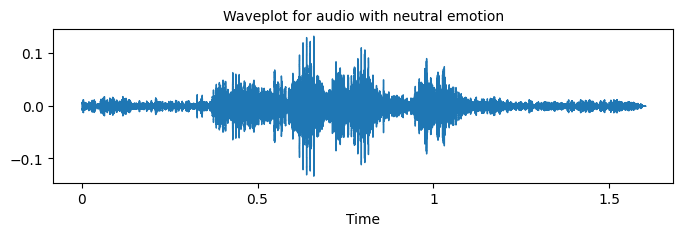

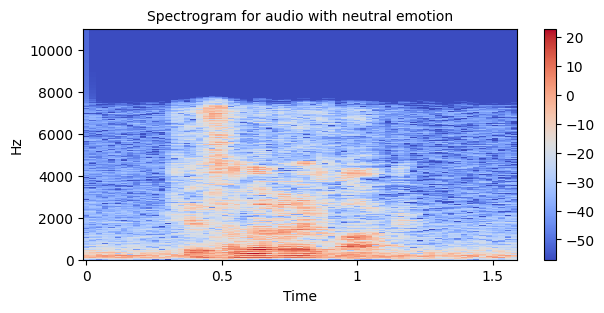

In [13]:
emotion = 'neutral'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

__Observation:__ Some of the audio files have too much echo (silence before the actual speaker says something). 

In [14]:
dir_list = os.listdir(crema)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [15]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(crema + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

The distribution between male and female actors is good enough.

111
108


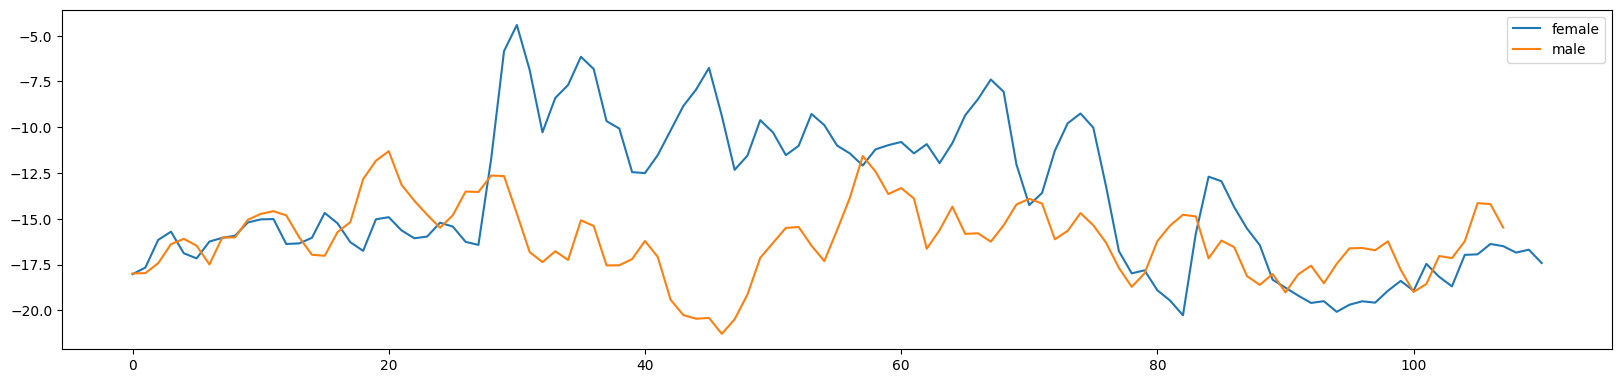

In [17]:
# Gender - Female; Emotion - Angry 
path = 'archive/AudioWAV/1003_IEO_ANG_HI.wav'
X, sample_rate = librosa.load(path)
female = librosa.feature.mfcc(y=X, sr=sample_rate)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate), axis=0)
print(len(female))

# Gender - Male; Emotion - Angry 
path = 'archive/AudioWAV/1005_IEO_ANG_HI.wav'
X, sample_rate = librosa.load(path)  
male = librosa.feature.mfcc(y=X, sr=sample_rate)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

Females tend to have higher pitch than males. Next I'll look into happy males and females.

95
98


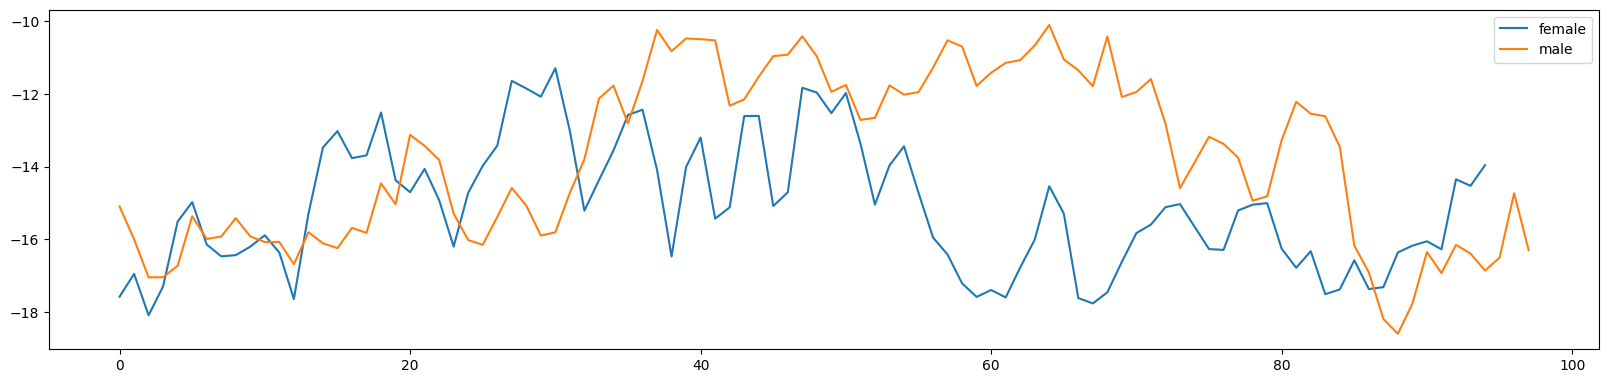

In [18]:
# Gender - Female; Emotion - Happy 
path = 'archive/AudioWAV/1003_IEO_HAP_HI.wav'
X, sample_rate = librosa.load(path)
female = librosa.feature.mfcc(y=X, sr=sample_rate)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate), axis=0)
print(len(female))

# Gender - Male; Emotion - Happy 
path = 'archive/AudioWAV/1005_IEO_HAP_HI.wav'
X, sample_rate = librosa.load(path)  
male = librosa.feature.mfcc(y=X, sr=sample_rate)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In this case, it seems that the males have higher pitch than females.

Next, I'll check the difference between and angry and happy male.

146
130


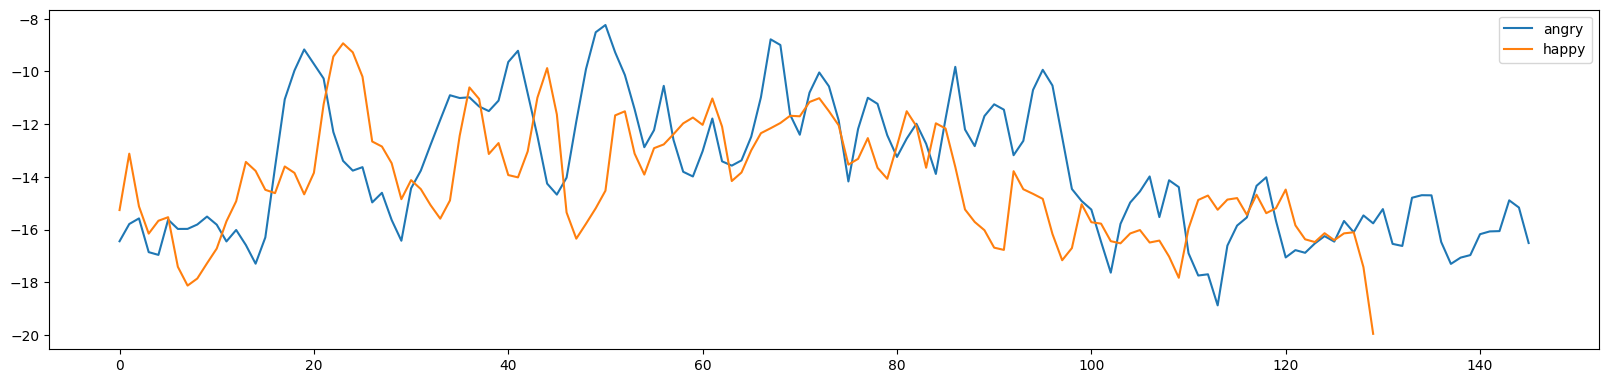

In [32]:
# Gender - Male; Emotion - Angry  
path = 'archive/AudioWAV/1005_IWL_ANG_XX.wav'
X, sample_rate = librosa.load(path)
male_ang = librosa.feature.mfcc(y=X, sr=sample_rate)
male_ang = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate), axis=0)
print(len(female))

# Gender - Male; Emotion - Happy 
path = 'archive/AudioWAV/1005_IWL_HAP_XX.wav'
X, sample_rate = librosa.load(path)  
male_hap = librosa.feature.mfcc(y=X, sr=sample_rate)
male_hap = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(male_ang, label='angry')
plt.plot(male_hap, label='happy')
plt.legend()

146
130


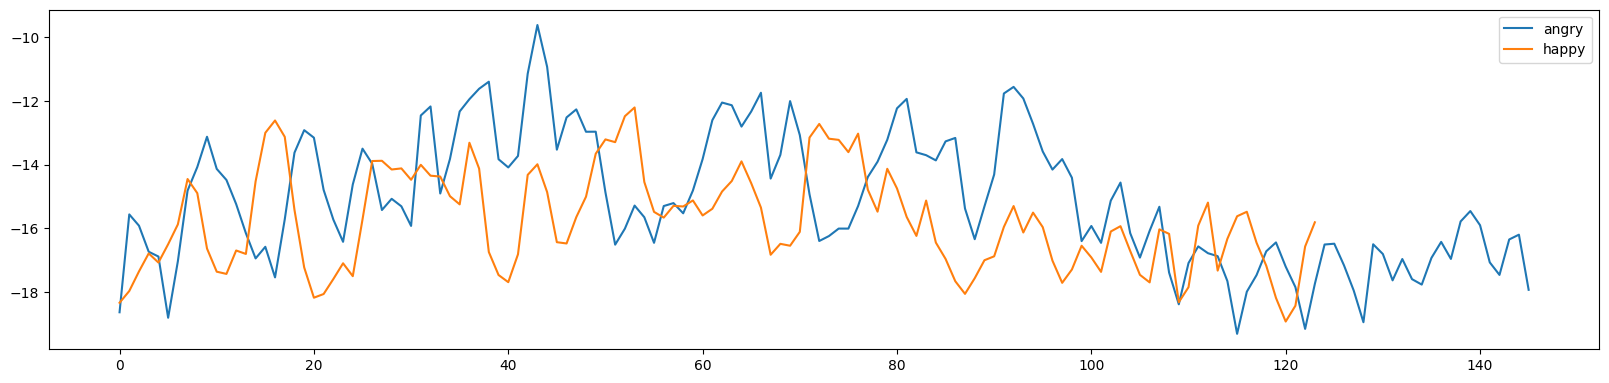

In [33]:
# Gender - Female; Emotion - Angry  
path = 'archive/AudioWAV/1004_ITS_ANG_XX.wav'
X, sample_rate = librosa.load(path)
female_ang = librosa.feature.mfcc(y=X, sr=sample_rate)
female_ang = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate), axis=0)
print(len(female))

# Gender - Female; Emotion - Happy 
path = 'archive/AudioWAV/1004_ITS_HAP_XX.wav'
X, sample_rate = librosa.load(path)  
female_hap = librosa.feature.mfcc(y=X, sr=sample_rate)
female_hap = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female_ang, label='angry')
plt.plot(female_hap, label='happy')
plt.legend()

The pitch of the angry emotion seem to be higher than the happy. However, they're almost identical.

## Conclusion

Overall, the dataset is big and has many different sentences and levels of emotions to show. However, most of the recordings are not that long, even on some of them the audio is cut halfway when the speaker is saying a sentence. Besides that, I'm not so sure if it'd consider some of the emotions as corresponding labels they have. For instance, the emotion happy sometimes sounds to me more like neutral, same for the angry one. But then again, could be due to the audio quality. I would say that we could ignore using the data for modeling. However, it would be possible to test on it.